In [160]:
import GA as ga

equation_inputs = [4,-2,3.5,5,-11,-4.7]
num_weights = len(equation_inputs)
sol_per_pop = 8
num_parents_mating = 4
pop_size = (sol_per_pop,num_weights) 
new_population = np.random.uniform(low = -4.0, high = 4.0, size = pop_size)

best_outputs = []
num_generations = 50
for generation in range(num_generations):
    # print("Generation : ", generation)
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    # print(fitness)

    # SELECTION
    best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
    # print("Best result : ", np.max(np.sum(new_population*equation_inputs, axis=1)))
    parents = ga.select_mating_pool(new_population, fitness, 
    num_parents_mating)
    # print(parents)

    # CROSSOVER
    offspring_crossover = ga.crossover(parents,
    offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    # print(offspring_crossover)

    # MUTATION
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    # print(offspring_mutation)

    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

fitness = ga.cal_pop_fitness(equation_inputs, new_population)

best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[  3.50921289  -1.81446497  16.20008869  -1.67732633  -3.15479471
   -20.02617081]]]
Best solution fitness :  [194.80520486]


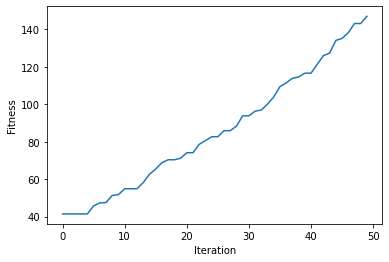

In [67]:
plt.plot(best_outputs)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()

===================Parent: 5, Genes: 10===================
Best solution :  [[[ 2.69861602  1.22629092 10.28998083  2.98906682 -2.84332496
   -7.33982261]]]
Best solution fitness :  [125.07589003]


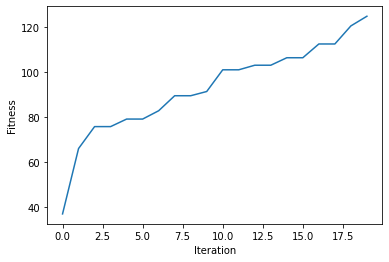

===================Parent: 6, Genes: 12===================
Best solution :  [[[  2.79243248  -3.17064132   9.15840665   3.72553709  -0.96075276
   -12.93586841]]]
Best solution fitness :  [139.55998316]


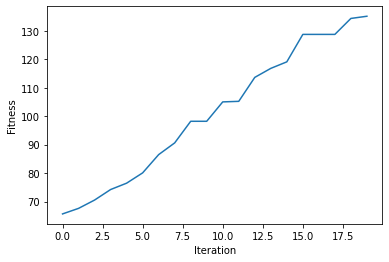

===================Parent: 7, Genes: 14===================
Best solution :  [[[ 3.16262382 -1.07956832 10.12192949  3.52588125 -3.92517212
   -6.9922272 ]]]
Best solution fitness :  [143.90615251]


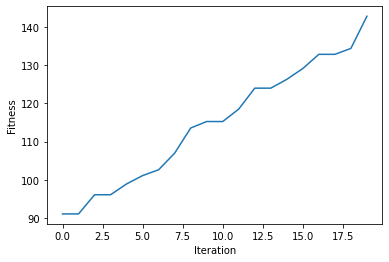

===================Parent: 8, Genes: 16===================
Best solution :  [[[ 2.20857218 -0.21854648  4.75123665  3.38901031 -2.56037826
   -8.8166483 ]]]
Best solution fitness :  [112.44816942]


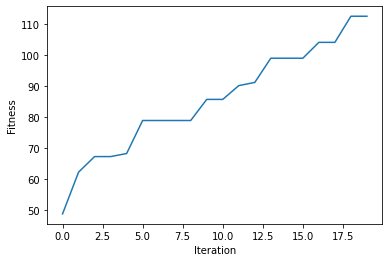

===================Parent: 9, Genes: 18===================
Best solution :  [[[ 3.25385269  3.06489002  9.21472323  3.81988631 -2.00909867
   -6.73612532]]]
Best solution fitness :  [111.99646801]


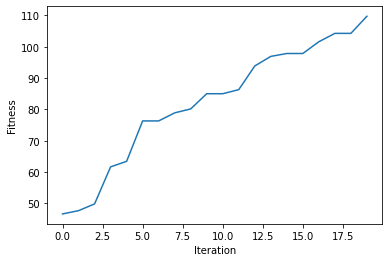

In [83]:
import GA as ga

def main(parents, genes, generations = 50):
    equation_inputs = [4,-2,3.5,5,-11,-4.7]
    num_weights = len(equation_inputs)
    sol_per_pop = genes
    num_parents_mating = parents
    pop_size = (sol_per_pop,num_weights) 
    new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)

    best_outputs = []
    num_generations = generations
    for generation in range(num_generations):
        fitness = ga.cal_pop_fitness(equation_inputs, new_population)

        # SELECTION
        best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
        parents = ga.select_mating_pool(new_population, fitness, 
        num_parents_mating)

        # CROSSOVER
        offspring_crossover = ga.crossover(parents,
        offspring_size=(pop_size[0]-parents.shape[0], num_weights))

        # MUTATION
        offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)

        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation

    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    print("Best solution : ", new_population[best_match_idx, :])
    print("Best solution fitness : ", fitness[best_match_idx])
    plt.plot(best_outputs)
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

parent_list = np.arange(5, 10)
genes_list  = np.arange(10, 20, 2)
for parent, gene in zip(parent_list, genes_list):
    print(f'===================Parent: {parent}, Genes: {gene}===================')
    main(parent, gene, generations = 20)

Generation 50: Max Fitness = 63.0, Avg Fitness = 53.495
Best Individual =  1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 



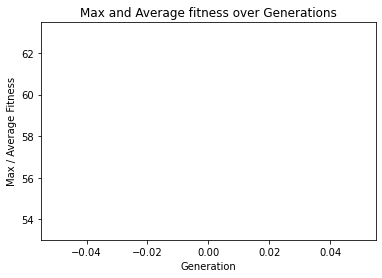

In [40]:
from deap import base
from deap import creator
from deap import tools
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ONE_MAX_LENGTH = 100 

# GA Constraints
POPULATION_SIZE = 200 
P_CROSSOVER = 0.9 
P_MUTATION = 0.1 
MAX_GENERATIONS = 50 

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness = creator.FitnessMax)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def oneMaxFitness(individual):
    return sum(individual), # return a tuple

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

fitnessValues = list(map(toolbox.evaluate, population))

for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

fitnessValues = [individual.fitness.values[0] for individual in population]
maxFitnessValues = []
meanFitnessValues = []

while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
    generationCounter = generationCounter + 1
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

for child1, child2 in zip(offspring[::2], offspring[1::2]):
    if random.random() < P_CROSSOVER:
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

for mutant in offspring:
    if random.random() < P_MUTATION:
        toolbox.mutate(mutant)
        del mutant.fitness.values

freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
    individual.fitness.values = fitnessValue

population[:] = offspring
fitnessValues = [ind.fitness.values[0] for ind in population]

maxFitness = max(fitnessValues)
meanFitness = sum(fitnessValues) / len(population)
maxFitnessValues.append(maxFitness)
meanFitnessValues.append(meanFitness)
print("Generation {}: Max Fitness = {}, Avg Fitness = {}" .format(generationCounter, maxFitness, meanFitness))

best_index = fitnessValues.index(max(fitnessValues))
print("Best Individual = ", *population[best_index], "\n")


plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()